## Challenge 2.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 

In [2]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 10. # maximum time
nsteps = int(tmax/dt)  # number of steps

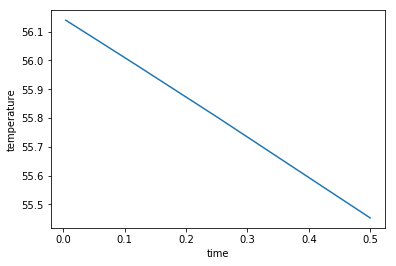

In [3]:
import numpy as np
from matplotlib import pyplot
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx
dt = 1.
n = 8
inv=2
my_temp = np.zeros(n)
dtime = np.zeros(n)

for j in range(0,n):
    dt = dt/inv
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    T = T0
    for i in range(1,nsteps):
        T = euler(T, -r*(T-Ts), dt)
    my_temp[j] = T
    dtime[j]=dt
    
pyplot.plot(dtime,my_temp)
pyplot.xlabel('time');
pyplot.ylabel('temperature');

### Challenge 2.2

Repeat the calculation in Challenge 2.1 using 4th order Runge-Kutta

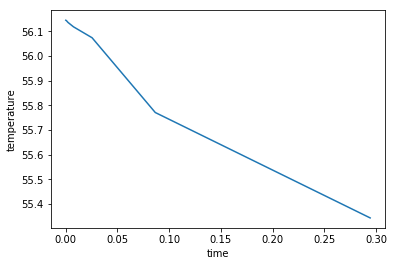

In [6]:
import numpy as np
from matplotlib import pyplot
def rk4(x, func, h):
        k1 = h*func(x)
        k2 = h*func(x+0.5*k1)
        k3 = h*func(x+0.5*k2)
        k4 = h*func(x+k3)
        x += (k1+2*k2+2*k3+k4)/6
    
        return x
dt = 1.
n = 8
inv=3.4
my_temp = np.zeros(n)
dtime = np.zeros(n)

for j in range(0,n):
    dt = dt/inv
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    T = T0
    for i in range(1,nsteps):
        dTemp = lambda T: -r*(T-Ts)
        T = rk4(T, dTemp, dt)
    my_temp[j] = T
    dtime[j]=dt
    
pyplot.plot(dtime,my_temp)
pyplot.xlabel('time');
pyplot.ylabel('temperature');

# Exercise 4: Gravitational force 
According to Newton’s law of gravitation, the action of the
gravitational field of the earth on a particle is given by
$$F=\frac{GMm}{(R+y)^2}=\frac{gm}{(1+y/R)^2},$$ where $y$ is measured
from the earth’s surface, $R$ is the earth’s radius, $G$ is the
gravitational constant, $M$ is the mass of the earth, and $g=GM/R^2$.
There is not simple analytical solution for this problem. Modify your
code to simulate the fall of a particle from an altitude $y_0$ with zero
initial velocity, and compute its speed when it hits the ground.
Determine the value of $y_0$ for which this impact velocity differs by
one percent from its value under a constant acceleration $g=9.8m/s^2$.
Take the radius of the earth to be $6.37\times 10^6m$.
## Challenge 2.3:

Modify the previous code to introduce the a gravitational force that depends on the position, and solve Exercise 4

In [4]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

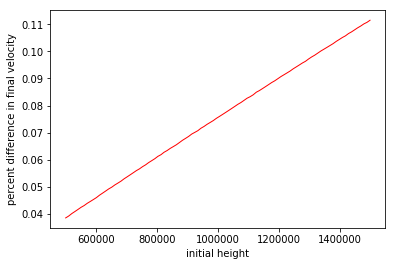

In [23]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
R = 6371000
v0 = 0.            # initial velocity
          # initial position
dt = 0.05           # time step

gforce = lambda y: g*mass/(1+y/R)**2    # weight as a function of height
gforce2 = lambda y: g*mass
yl=500000
yh = 1500000
y0 = np.linspace(yl,yh,100)
vf = []
vf2 = []

for k in range(0,100):
    p = particle(mass, y0[k], v0)
    p2 = particle(mass,y0[k],v0)
    y = [y0[k]]
    y2 = [y0[k]] # since we do not know the size of the arrays, we define first a python list
    v = [v0] # the append method is more efficient for lists than arrays
    v2 = [v0]
    t = [0.]
    t2 = [0.]

    while p.y > 0.:
        fy = -gforce(p.y)#-k2*p.v*abs(p.v)
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
    while p2.y > 0.:
        fy2 = -gforce2(p2.y)
        p2.euler(fy2, dt)
        y2.append(p2.y)
        v2.append(p2.v)
        t2.append(t2[-1]+dt)
    vf.append(v[-1])
    vf2.append(v2[-1])

    #for i in range(0,t_data.size):
    #    print (i,t_data[i], y_data[i], v_data[i])
vf_data = np.array(vf)
vf2_data = np.array(vf2)
y_data = np.array(y0)
perdiff = (vf2_data-vf_data)/vf_data

pyplot.plot(y_data,perdiff, color="#FF0000", ls='-', lw=1)
#pyplot.plot(vf2_data, y_data, color="#FF0000", ls='-', lw=1)
pyplot.xlabel('initial height')
pyplot.ylabel('percent difference in final velocity');

# Exercise 6: Trajectory of a shot 

Modify your code so that the 2d trajectory of an object can be computed,
and graphs of $y$ as a function of $x$ can be made.

1.  As a check on your program, first neglect the effect of air
    resistance so that you an compare to known results. Supouse that the
    object is thrown and $t_0$ with an angle $\theta _0$ with an initial
    velocity $v_0=15$m/s. Vary $\theta_0$ and show that the maximum
    range occurs at $\theta_0=45^{\circ}$ Compare your result with the
    exact value $v_0^2/g$

2.  Consider the effects of air resistance. Compute the maximum range,
    and the corresponding angle using $k/m=0.1$, $v_0=30$m/s.

## Challenge 2.4: 

Modify the previous code to include the effect of drag resistance, and solve Exercise 6, part 2.

In [1]:
class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

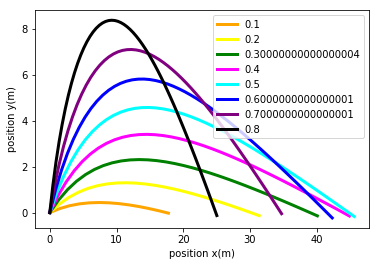

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

g = 9.8            # g acceleration
v0 = 30.           # initial velocity
m=1
k=.1*m
dt = 0.05           # time step

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

for angle in range(1,9):
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle*0.1*math.pi/2.)*v0] 
    vy = [math.sin(angle*0.1*math.pi/2.)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0.:
        vtot = math.sqrt(p.vx**2+p.vy**2)
        fx = -k*p.vx*vtot
        fy = -g-k*p.vy*vtot
        p.euler(0., fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)

    my_plot = pyplot.plot(x_data, y_data, color=(colors[angle]), ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend()

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)');

The maximum height that I calculate occurs at some angle below 45 degrees. I need a more finely grated angle. 